In [ ]:
                                              # ML -MAJOR PROJECT
            #This is the project that analyses the data given to be trained and is trained to predict the model.

In [0]:
import pandas as pd #importing pandas

In [119]:
from google.colab import drive
drive.mount('/content/drive')  #to use the train data and test data file in the google drive by googlecolab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#data=pd.read_excel("/content/drive/My Drive/Data_Train_verzeo.xlsx")
data=pd.read_excel("/content/drive/My Drive/Data_Train (1).xlsx")         #train data
datatest=pd.read_excel("/content/drive/My Drive/Data_Test (1).xlsx")      #test data

In [121]:
print(data.head())

                               Name    Location  Year  ...  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010  ...    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011  ...    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012  ...    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...    5.0        NaN  17.74

[5 rows x 13 columns]


In [112]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [113]:
data['Mileage'].notnull().sum()

6017

In [0]:
import numpy as np 
bin1=np.linspace((min((data['Kilometers_Driven']))),(max((data['Kilometers_Driven']))),50)
group_values=list(range(1,50))
data['Kilometers_Driven-binned']=pd.cut(data['Kilometers_Driven'],bin1,labels=group_values,include_lowest=True)

In [101]:
data.head(100)


0     58.16
1     126.2
2      88.7
3     88.76
4     140.8
      ...  
95     98.6
96     73.9
97      110
98     67.1
99    103.5
Name: Power, Length: 100, dtype: object

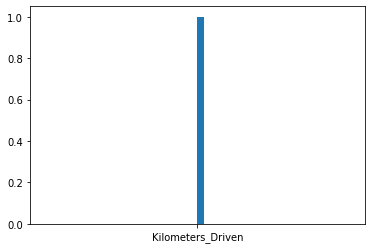

In [68]:
import matplotlib.pyplot as plt          #analysing kilometers_driven in a graph
plt.hist('Kilometers_Driven',bins=50)
plt.show()

In [95]:
data.corr()

TypeError: ignored

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data)


0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object


In [198]:

data.fillna(data.mean(), inplace=True)
data['Mileage']=data['Mileage'].astype(str)
data['Mileage']=data['Mileage'].map(lambda x: x.replace(' kmpl',''))
data['Mileage']=data['Mileage'].map(lambda x: x.replace(' km/kg',''))
data['Mileage']=data['Mileage'].astype(float)
datatest['Mileage']=datatest['Mileage'].astype(str)
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace(' kmpl',''))
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace(' km/kg',''))
datatest['Mileage']=datatest['Mileage'].astype(float)
print(data)

                                  Name    Location  ...  New_Price  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...        NaN   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...        NaN  12.50
2                         Honda Jazz V     Chennai  ...  8.61 Lakh   4.50
3                    Maruti Ertiga VDI     Chennai  ...        NaN   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...        NaN  17.74
...                                ...         ...  ...        ...    ...
6014                  Maruti Swift VDI       Delhi  ...  7.88 Lakh   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...        NaN   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...        NaN   2.90
6017                Maruti Wagon R VXI     Kolkata  ...        NaN   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...        NaN   2.50

[5936 rows x 13 columns]


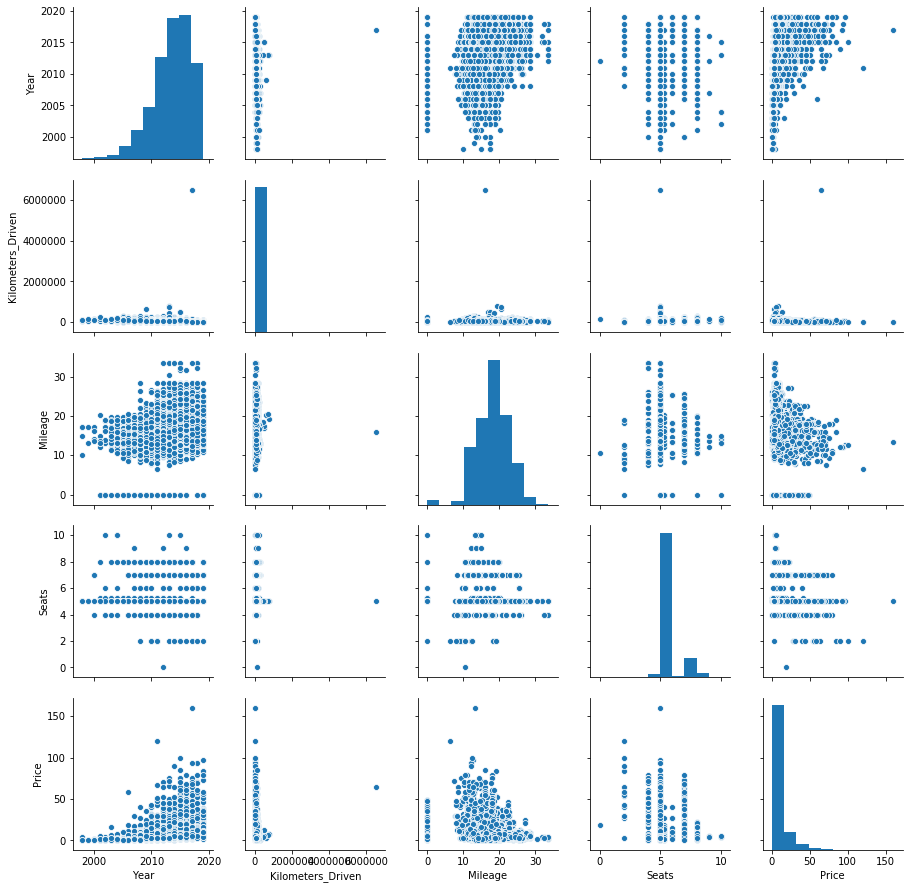

In [148]:
#sns.regplot(x='Mileage', y='Price', data=data)
sns.pairplot(data)      #plotting various types of graphs so as to find the relation between the different attributes and the output
#plt.ylim(0,)
#plt.xlim(0,)

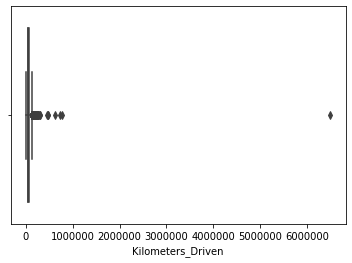

In [173]:
sns.boxplot(x=data['Kilometers_Driven']) #taking the attribute that has most of the linear relation for analysis using regression concept
#drawing boxplots for analysis

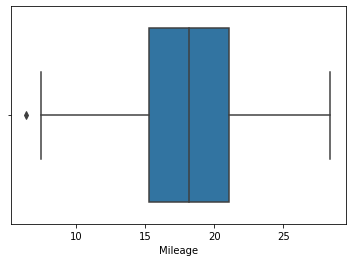

In [203]:
sns.boxplot(x=data['Mileage']) #this was drawn to correct the errors and to find the outlier values in the dataset

In [32]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [0]:
data.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,6019,824
unique,1876,11,5,2,4,442,146,373,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [0]:
data['Fuel_Type'].count()

6019

In [2]:
import seaborn as sns
sns.boxplot(x='Kilometers_Driven',y='Price',data=data)

NameError: name 'data' is not defined

In [0]:
from scipy import stats

In [0]:
pearson_coef, p_value = stats.pearsonr(data['Kilometers_Driven'], data['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.011492790740116172  with a P-value of P = 0.3726714985699097


11870 5935


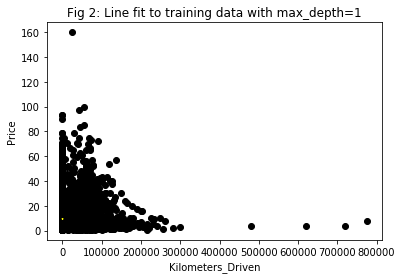

Training MSE:  121.81147826449558
11870 5935


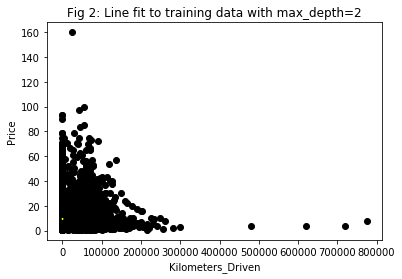

Training MSE:  121.96994454811409
11870 5935


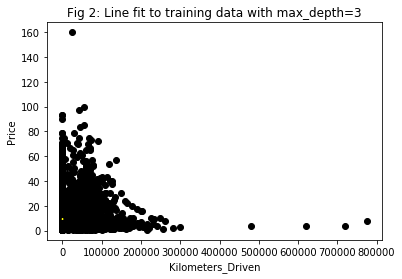

Training MSE:  122.2904422188847
11870 5935


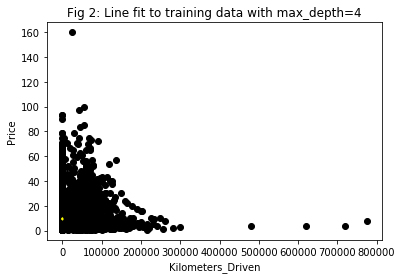

Training MSE:  122.83346265050054
11870 5935


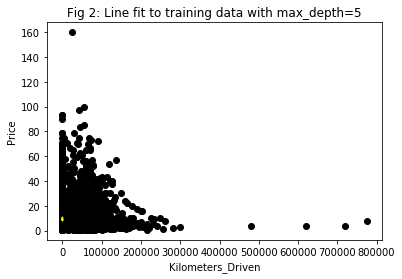

Training MSE:  123.42182858184678
11870 5935


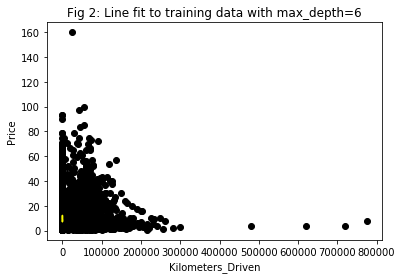

Training MSE:  123.85326932603394
11870 5935


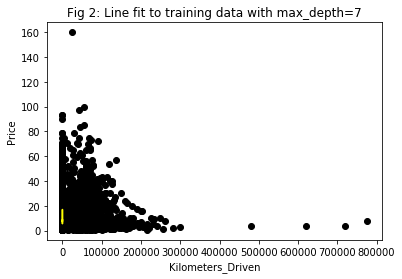

Training MSE:  124.3843381551497
11870 5935


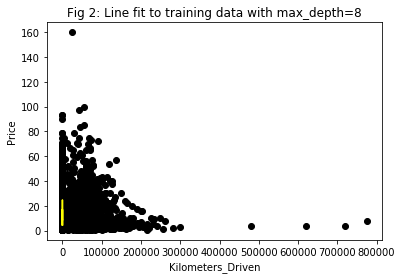

Training MSE:  125.52794233988904
11870 5935


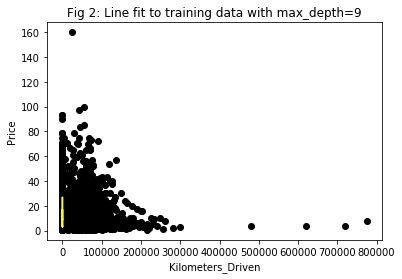

Training MSE:  126.97959506293972
11870 5935


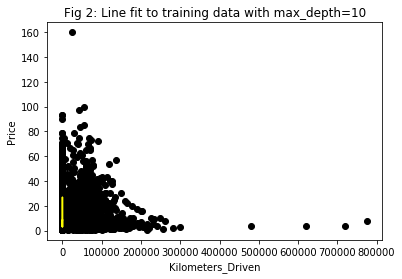

Training MSE:  128.72788900564356


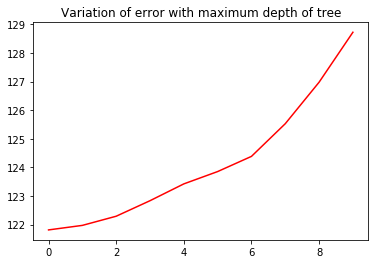

In [206]:
#MODEL TRAINING AND FITTING. THE FINAL OUTPUT IS AS SHOWN IN THE GRAPH.THE FITTING ON TESTING DATA IS SHOWN IN LIGHT YELLOW COLOR.
from sklearn import tree
import numpy as np
import statistics
data.fillna(data.mean(), inplace=True)
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
#test_err_arr=[]
data.drop(data[data.Mileage < 7].index, inplace=True)
data.drop(data[data.Mileage > 30].index, inplace=True)
data.drop(data[data.Kilometers_Driven > 6000000].index, inplace=True)
#data1=data[data['Kilometers_Driven']!=6500000]
for depth in maximum_depth_of_tree:
  lm = tree.DecisionTreeRegressor(max_depth=depth)
  #x=data[data['Kilometers_Driven']<6000000]
  x=data[['Mileage']+['Kilometers_Driven']]
  y=data[['Price']]
  print(x.size,y.size)
  arr = x.values.copy()
  arr.resize(y.size, 1)
  x=pd.DataFrame(arr)
  lm.fit(x,y)
#Fit the line to the training data

#Plot the line
  xtest=datatest[['Mileage']]
  #ytest=datatest[['Price']]
  plt.scatter(x, y, color='black')
  plt.plot(xtest.values,lm.predict(xtest.values),color='yellow')
  plt.xlabel('Kilometers_Driven')
  plt.ylabel('Price')
  plt.title('Fig 2: Line fit to training data with max_depth='+str(depth))
  plt.show()
  mean_val_error =np.mean((y.values - lm.predict(x.values))**2,dtype=np.float64)
  train_err_arr.append(mean_val_error)
  #test_err_arr.append(mean_test_error)
  print('Training MSE: ', mean_val_error)
  #print('Testing MSE: ', mean_test_error)
plt.figure()
plt.plot(train_err_arr,c='red')
#plt.plot(test_err_arr,c='green')
plt.title('Variation of error with maximum depth of tree')
plt.show()

In [0]:
data['Seats'].dropna()

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 5977, dtype: float64

In [0]:
data['Seats'].isnull().sum()

42

In [0]:
lm.score()   #post simple analysis

In [0]:
from sklearn import preprocessing 
X=preprocessing.StandardScaler.fit(X).transform(X)